# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

## **Description**

We have the historical stock data of Axis bank, State Bank of India and Kotak Mahindra Bank. In this notebook I have performed an analysis of the given data for 3 financial years i.e. 2020, 2021 and 2022. <br>

**Note : The financial year stars from the month of April in India and all the stock prices are in INR (Indian Rupee)**

- Region - India
- Domain - Finance

- Research Question 1 - How the stocks prices of different banks have changed from financial year 2020 to 2022?
- Research Question 2 - How the stock prices depend on the volume of stocks sold?
- Research Question 3 - Is there any correlation between the stock prices of different banks?

## **Datasets Links**
- [State Bank of India](https://finance.yahoo.com/quote/SBIN.NS/history?period1=1585699200&period2=1680307200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)
- [Kotak Mahindra Bank](https://finance.yahoo.com/quote/KOTAKBANK.NS/history/)
- [Axis Bank](https://finance.yahoo.com/quote/AXISBANK.NS/history?p=AXISBANK.NS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 400  # Enhancing the quality of the image
plt.rcParams['font.size'] = 5
plt.rc('figure', figsize=(4, 3))

### Reading the data

In [2]:
axis_bank = pd.read_csv('./axis_bank_stocks.csv')
sbi = pd.read_csv('./SBI_stocks.csv')
kotak = pd.read_csv('./kotak_stocks.csv')

### Data Interpetation and Cleaning

In [3]:
axis_bank.head()
axis_bank.shape

(746, 7)

In [4]:
sbi.head()
sbi.shape

(746, 7)

In [5]:
kotak.head()
kotak.shape

(746, 7)

In [7]:
axis_bank.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
sbi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
kotak.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Cool, there are no null values in the datasets

In [10]:
# Colors
axis_bank['Date'] = pd.to_datetime(axis_bank['Date'])
sbi['Date'] = pd.to_datetime(sbi['Date'])
kotak['Date'] = pd.to_datetime(kotak['Date'])

#### Let's answer the first question

In [11]:
blue = '#1F75FE'
orange = '#ff8c42'
green = '#33b864'

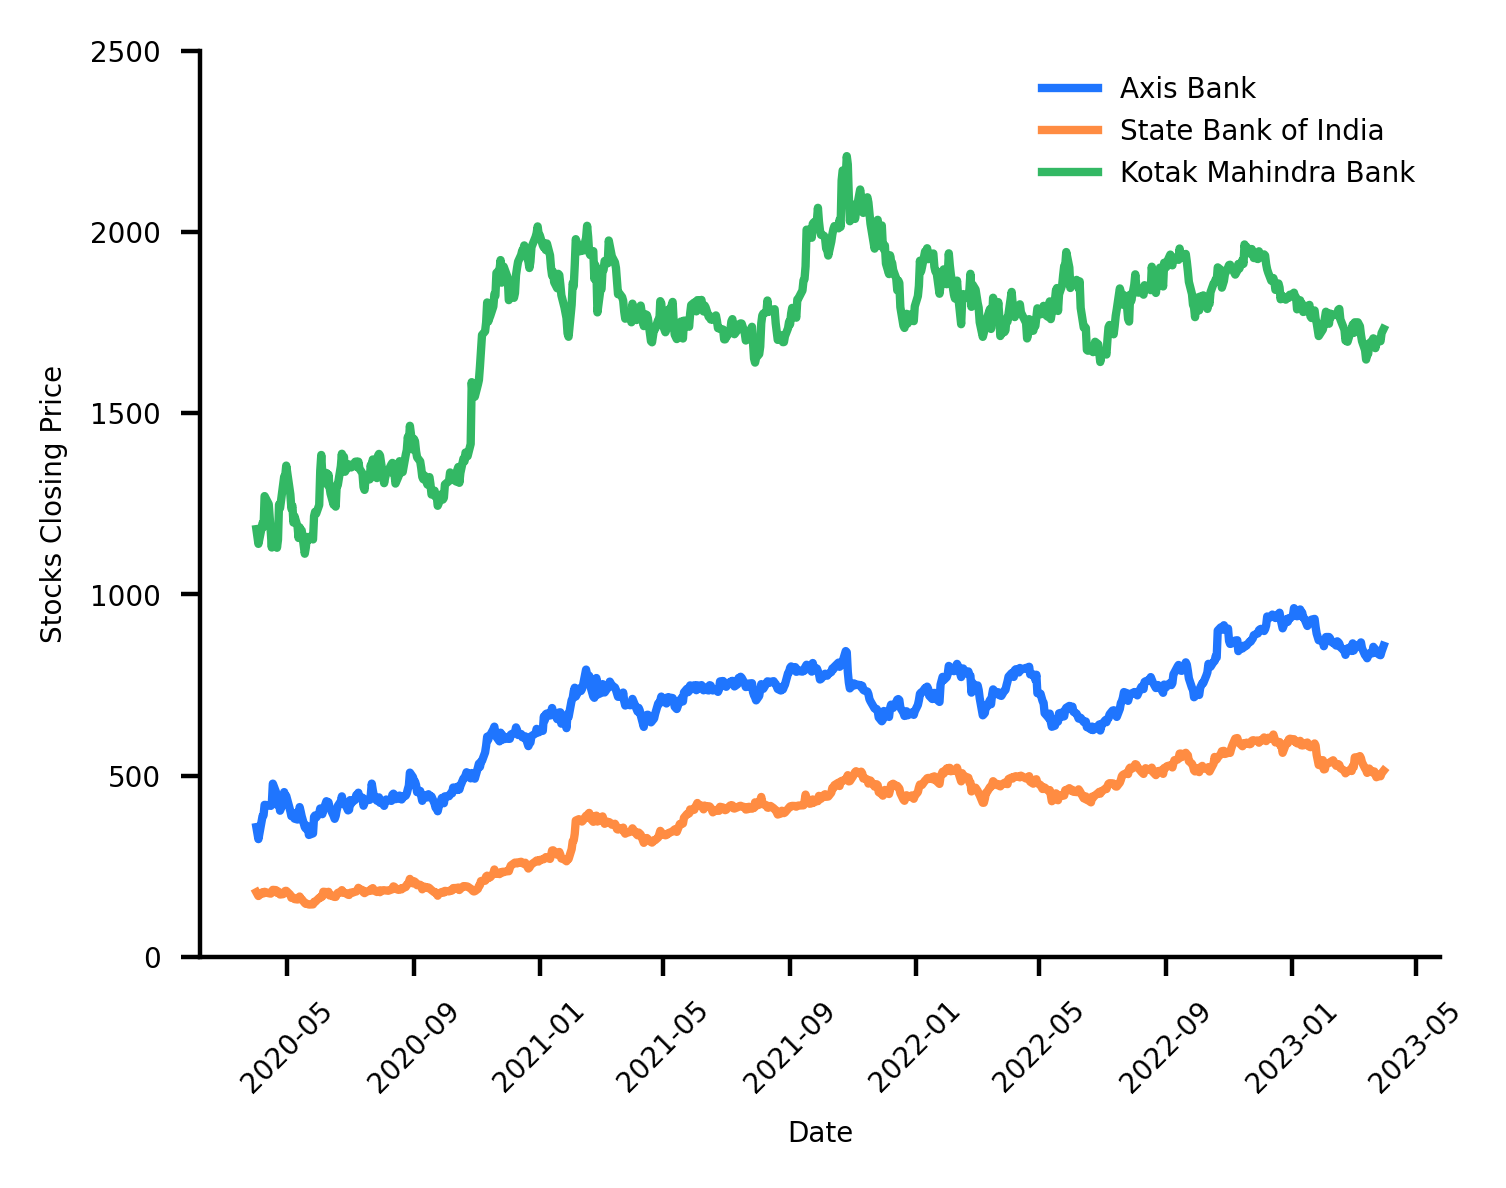

In [13]:
plt.plot(axis_bank['Date'], axis_bank['Adj Close'], c=blue, label='Axis Bank')
plt.plot(sbi['Date'], sbi['Adj Close'], c=orange, label='State Bank of India')
plt.plot(kotak['Date'], kotak['Adj Close'], c=green, label='Kotak Mahindra Bank')
plt.legend(frameon=False, loc='upper right')
plt.xlabel('Date')
plt.ylabel('Stocks Closing Price')
plt.ylim(0, 2500)
ax = plt.gca()

plt.xticks(rotation=45)

# Turn off the upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Second Question - Correlation of stock prices with stocks volume

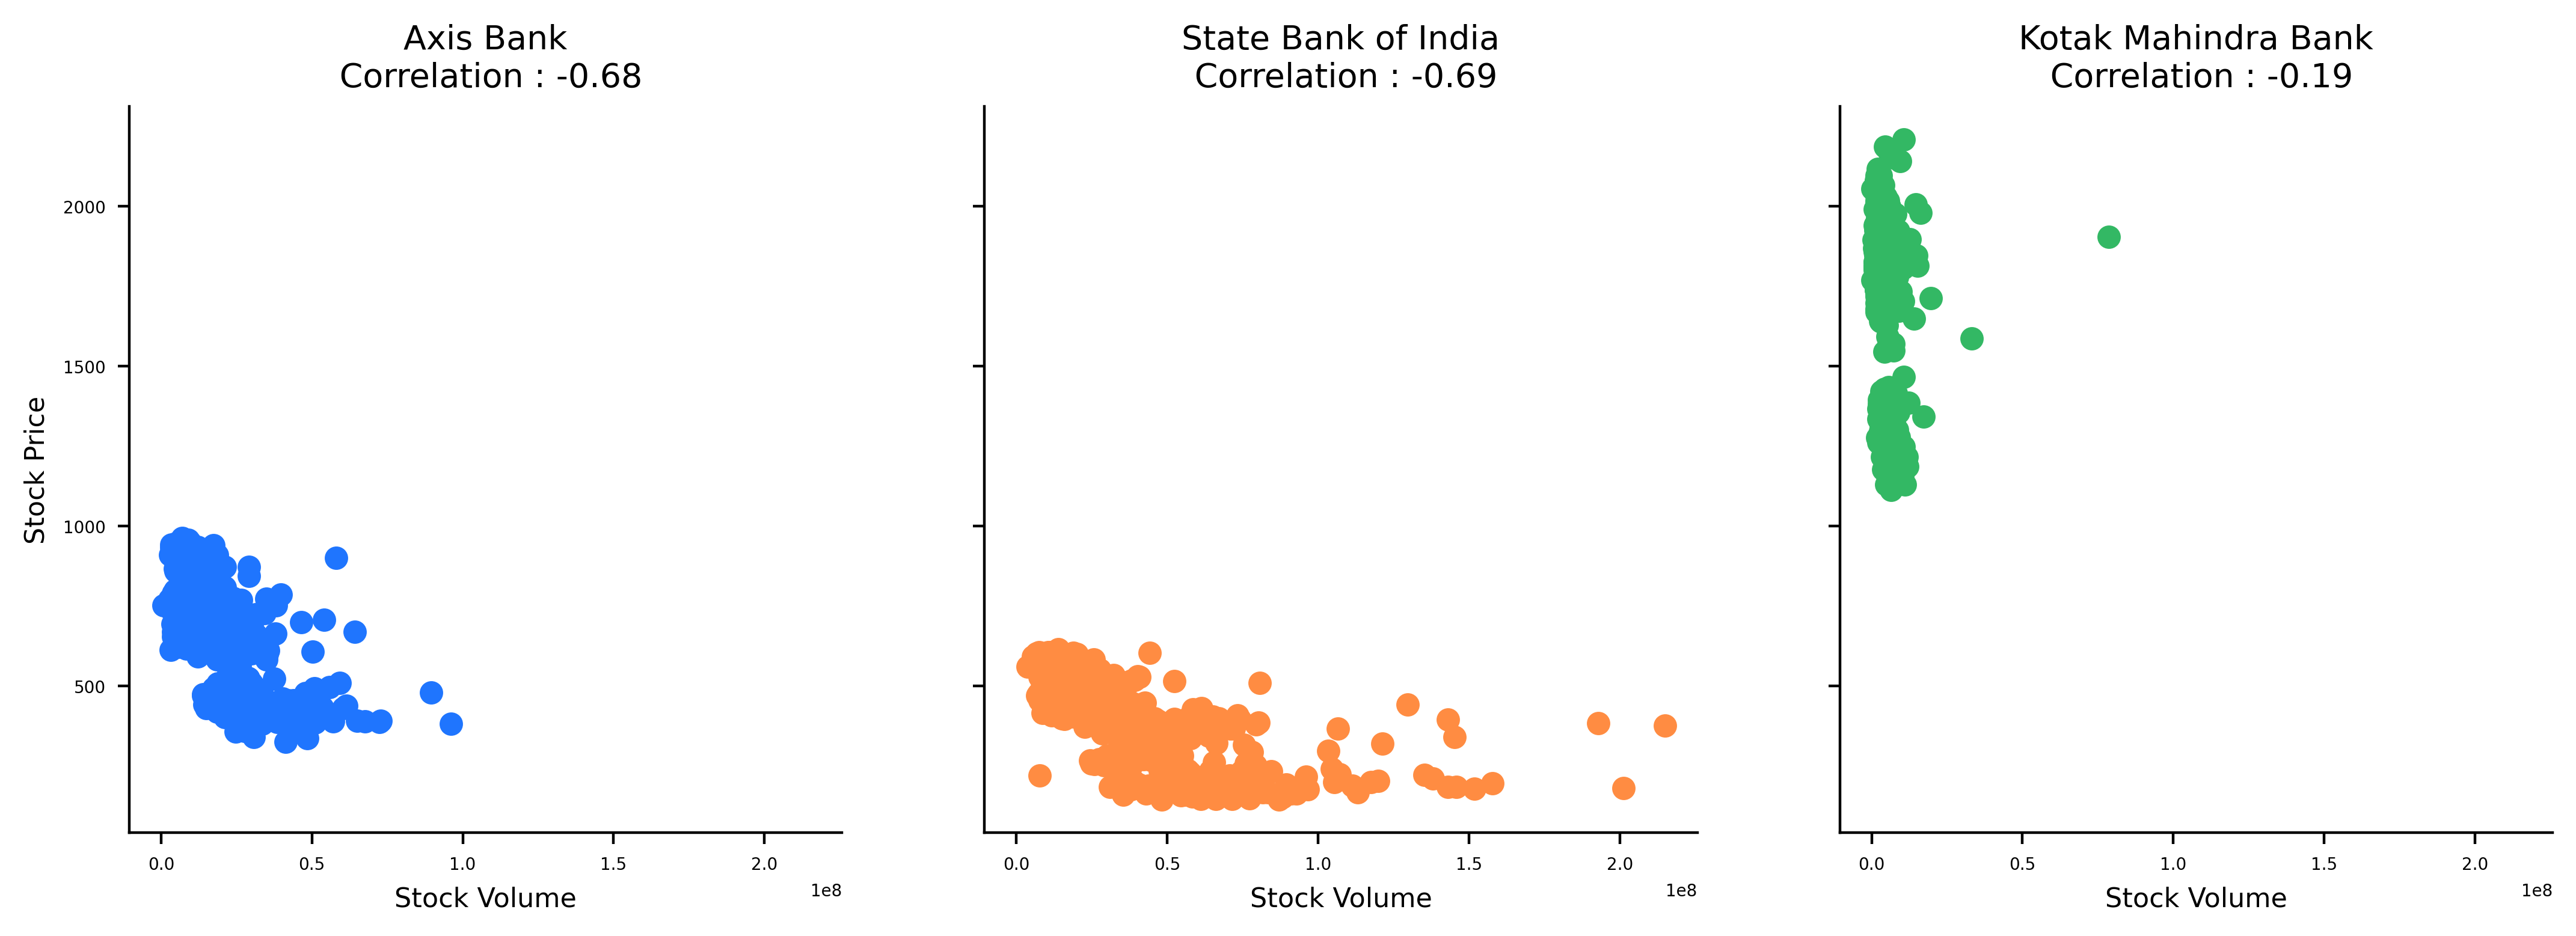

In [15]:
from scipy import stats

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(13,4), sharey=True, sharex=True)

corr1, pval = stats.pearsonr(axis_bank['Volume'], axis_bank['Adj Close'])

ax1.scatter(axis_bank['Volume'], axis_bank['Adj Close'], color=blue)
ax1.set_xlabel('Stock Volume', fontsize=8)
ax1.set_ylabel('Stock Price', fontsize=8)
ax1.set_title(f'Axis Bank\n Correlation : {round(corr1,2)}', fontsize=10)


corr2, pval = stats.pearsonr(sbi['Volume'], sbi['Adj Close'])

ax2.scatter(sbi['Volume'], sbi['Adj Close'], color=orange)
ax2.set_xlabel('Stock Volume', fontsize=8)
ax2.set_title(f'State Bank of India\n Correlation : {round(corr2,2)}', fontsize=10)


corr3, pval = stats.pearsonr(kotak['Volume'], kotak['Adj Close'])

ax3.scatter(kotak['Volume'], kotak['Adj Close'], color=green)
ax3.set_xlabel('Stock Volume', fontsize=8)
ax3.set_title(f'Kotak Mahindra Bank\n Correlation : {round(corr3,2)}', fontsize=10)

for ax in [ax1, ax2, ax3] :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show();


It is visible from the plots above that for SBI and Axis Bank, the correlation between the stock volume and stock price is highly negative while for Kotak Mahindra Bank, it is nearly 0

#### Third Question - Relationship between the stock prices of different banks

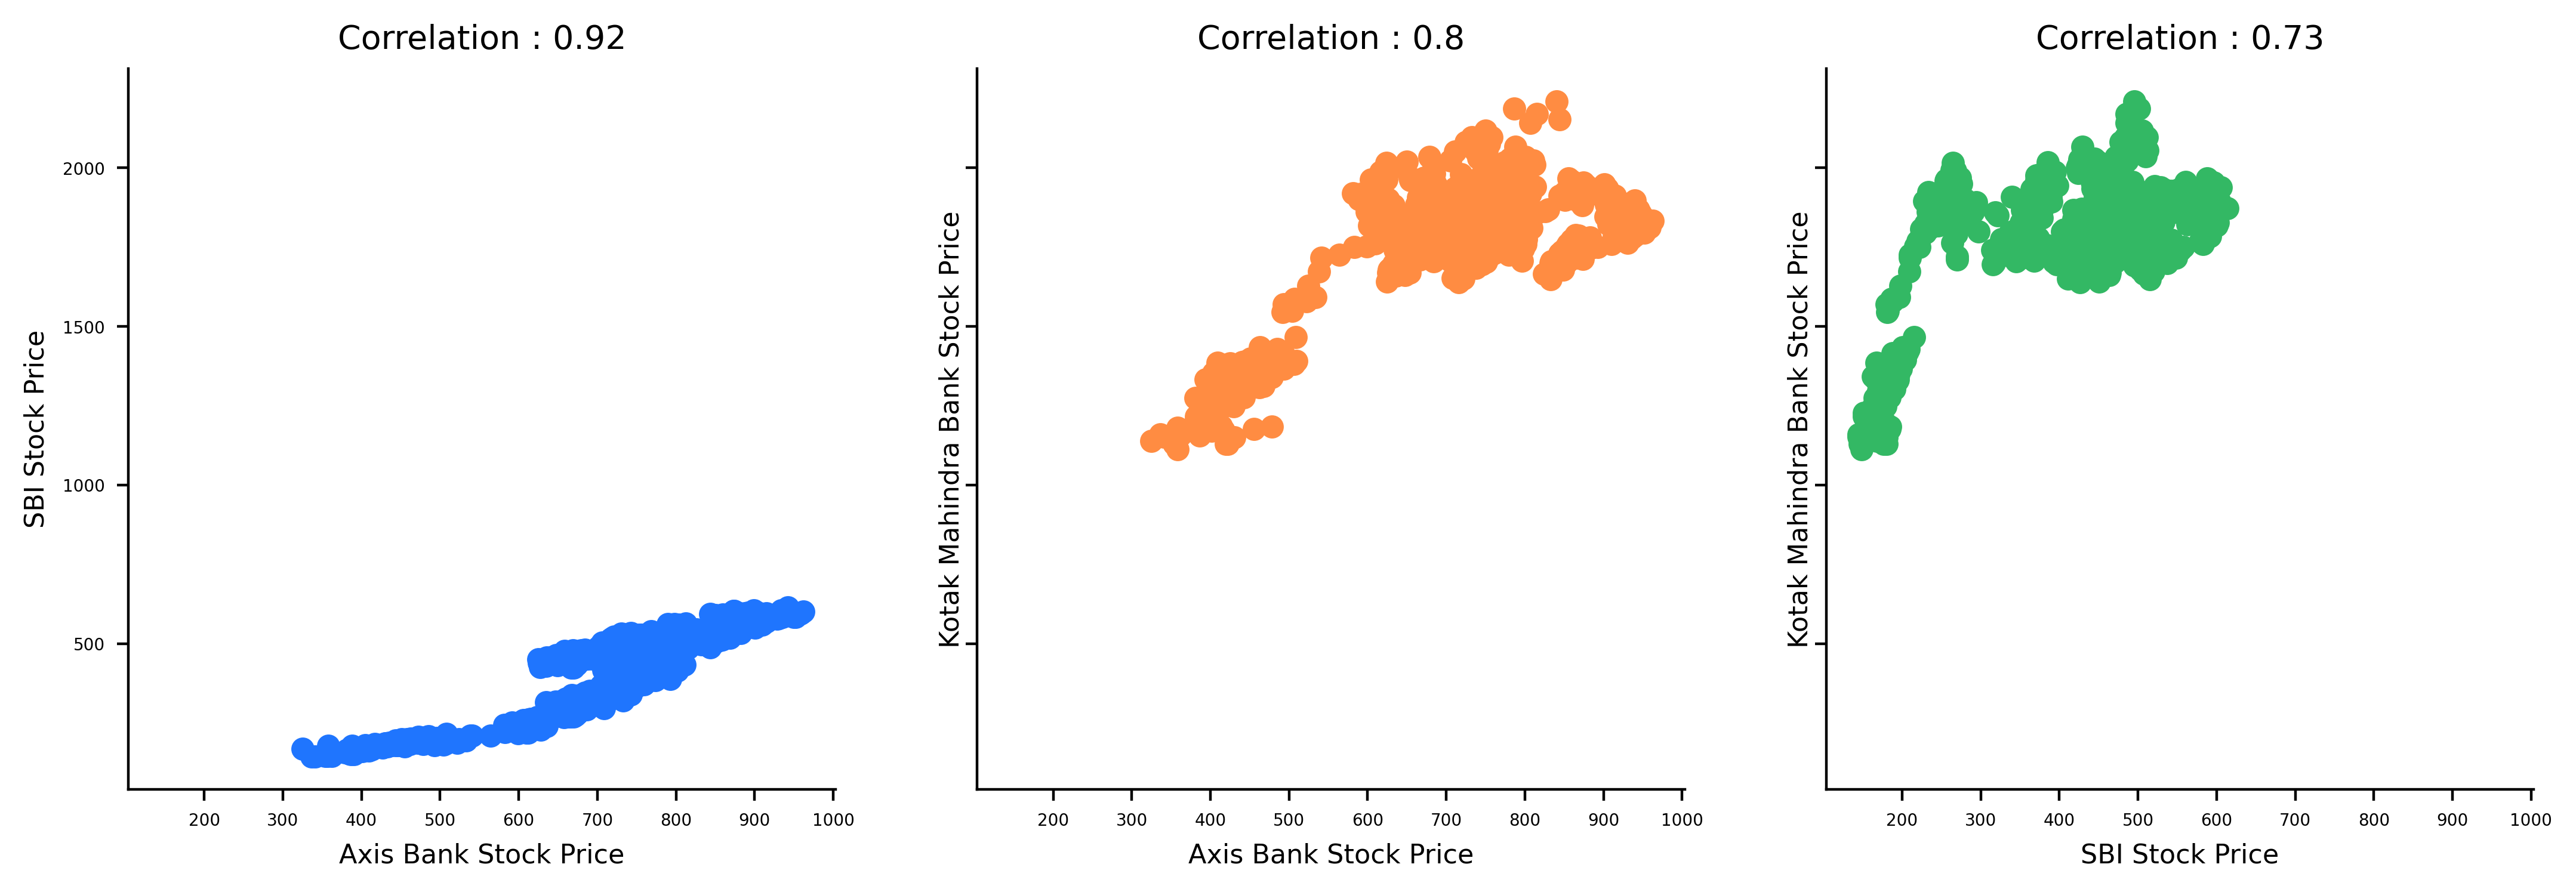

In [16]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(13,4), sharey=True, sharex=True)

corr1, pval = stats.pearsonr(axis_bank['Adj Close'], sbi['Adj Close'])

ax1.scatter(axis_bank['Adj Close'], sbi['Adj Close'], color=blue)
ax1.set_xlabel('Axis Bank Stock Price', fontsize=8)
ax1.set_ylabel('SBI Stock Price', fontsize=8)
ax1.set_title(f'Correlation : {round(corr1,2)}', fontsize=10)


corr2, pval = stats.pearsonr(axis_bank['Adj Close'], kotak['Adj Close'])

ax2.scatter(axis_bank['Adj Close'], kotak['Adj Close'], color=orange)
ax2.set_xlabel('Axis Bank Stock Price', fontsize=8)
ax2.set_ylabel('Kotak Mahindra Bank Stock Price', fontsize=8)
ax2.set_title(f'Correlation : {round(corr2,2)}', fontsize=10)


corr3, pval = stats.pearsonr(sbi['Adj Close'], kotak['Adj Close'])

ax3.scatter(sbi['Adj Close'], kotak['Adj Close'], color=green)
ax3.set_xlabel('SBI Stock Price', fontsize=8)
ax3.set_ylabel('Kotak Mahindra Bank Stock Price', fontsize=8)
ax3.set_title(f'Correlation : {round(corr3,2)}', fontsize=10)

for ax in [ax1, ax2, ax3] :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show();

##### We can also visualise the relationship between different stock prices using pairplot

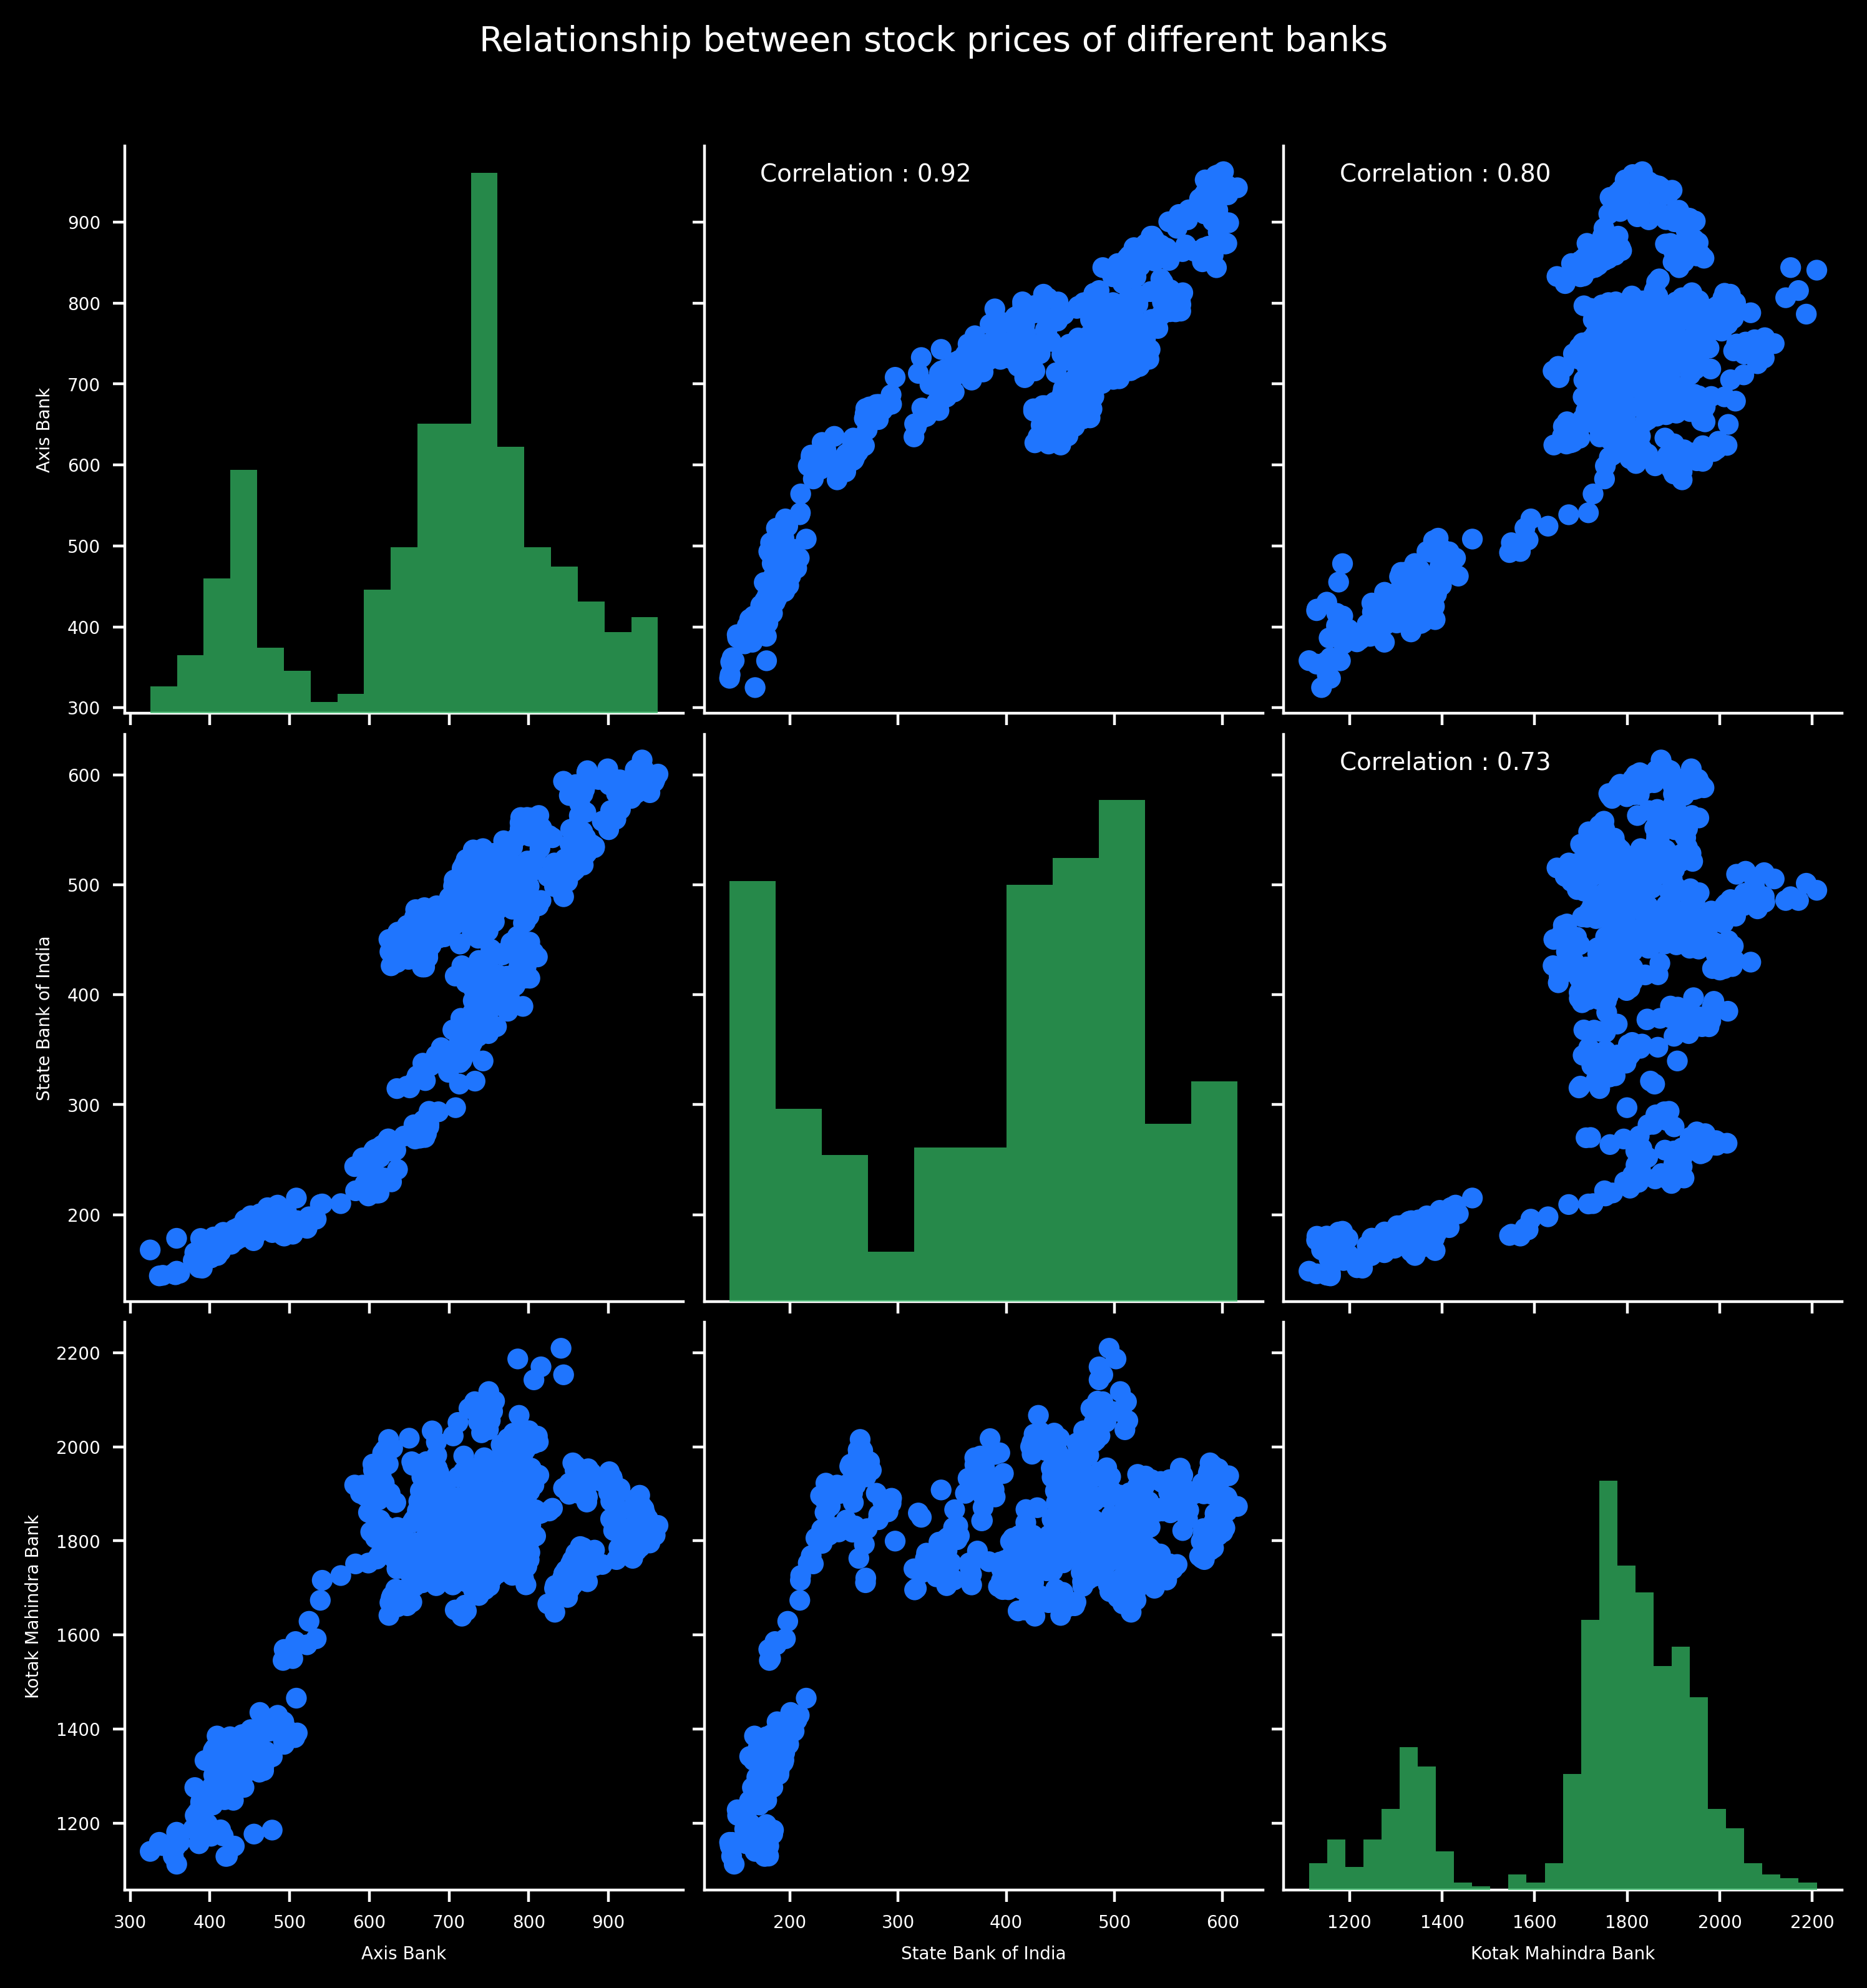

In [126]:
import seaborn as sns 

df = pd.DataFrame()
df['Axis Bank'] = axis_bank['Adj Close']
df['State Bank of India'] = sbi['Adj Close']
df['Kotak Mahindra Bank'] = kotak['Adj Close']
df
pair_plot = sns.pairplot(df, plot_kws={'color' : blue, 'edgecolor': 'None'}, diag_kws={'color': green, 'edgecolor': 'None'});

pair_plot.fig.suptitle("Relationship between stock prices of different banks", y=1.05, fontsize=10)

correlation_matrix = df.corr()
correlation_matrix

# Add the correlation values as text to the pair plot
for i, j in zip(*plt.np.triu_indices_from(pair_plot.axes, 1)):
    pair_plot.axes[i, j].annotate(f"Correlation : {correlation_matrix.iloc[i, j]:.2f}", (0.1, 0.95), xycoords="axes fraction", ha="left", va="center", fontsize=7)